In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [4]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


In [5]:
data = pd.read_csv('train_1.csv')
dataset= data.copy()
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone
0,1,0,3,1,22.0,1,0,0.916454,1,0,1,5,1,1,66.0,0.000000,0
1,2,1,1,2,38.0,1,0,1.859038,2,1,3,7,4,1,38.0,0.000000,0
2,3,1,3,2,26.0,0,0,0.950608,1,0,2,6,1,0,78.0,0.950608,1
3,4,1,1,2,35.0,1,0,1.733197,1,1,3,7,4,1,35.0,0.000000,0
4,5,0,3,1,35.0,0,0,0.956649,1,0,1,7,1,0,105.0,0.956649,1


In [6]:
dataset[(dataset.Age_Group == 5) & (dataset.Survived == 0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone
0,1,0,3,1,22.0,1,0,0.916454,1,0,1,5,1,1,66.0,0.000000,0
11,13,0,3,1,20.0,0,0,0.956649,1,0,1,5,1,0,60.0,0.956649,1
23,28,0,1,1,19.0,3,2,2.421604,1,1,1,5,4,5,19.0,0.000000,0
27,38,0,3,1,21.0,0,0,0.956649,1,0,1,5,1,0,63.0,0.956649,1
36,52,0,3,1,21.0,0,0,0.944483,1,0,1,5,1,0,63.0,0.944483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,862,0,2,1,21.0,1,0,1.096910,1,0,1,5,2,1,42.0,0.000000,0
682,865,0,2,1,24.0,0,0,1.146128,1,0,1,5,2,0,48.0,1.146128,1
693,877,0,3,1,20.0,0,0,1.035262,1,0,1,5,2,0,60.0,1.035262,1
694,878,0,3,1,19.0,0,0,0.949185,1,0,1,5,1,0,57.0,0.949185,1


In [7]:
dataset['temp']=(2*dataset['Pclass']*dataset['Alone'])

In [9]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)
cat_columns = []
cat_columns = ['Sex', 'Age_Group', 'Title','Pclass','Cabin_Provided','Embarked']
#cat_columns = ['Sex','Pclass','Title',]
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Cabin_Provided' 'Title' 'Age_Group' 'Fare_Group'
 'Total_Members' 'Age_Class' 'fare_per_person' 'Alone' 'temp']
 Dropped Columns : ['Survived', 'PassengerId']
Cateogrical Columns : ['Sex', 'Age_Group', 'Title', 'Pclass', 'Cabin_Provided', 'Embarked'] 
 Numerical Columns : ['Fare_Group', 'SibSp', 'Alone', 'Age_Class', 'temp', 'Age', 'Parch', 'Fare', 'fare_per_person', 'Total_Members']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone,temp
0,3,1,22.0,1,0,0.916454,1,0,1,5,1,1,66.0,0.000000,0,0
1,1,2,38.0,1,0,1.859038,2,1,3,7,4,1,38.0,0.000000,0,0
2,3,2,26.0,0,0,0.950608,1,0,2,6,1,0,78.0,0.950608,1,6
3,1,2,35.0,1,0,1.733197,1,1,3,7,4,1,35.0,0.000000,0,0
4,3,1,35.0,0,0,0.956649,1,0,1,7,1,0,105.0,0.956649,1,6


In [10]:
x.isna().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Cabin_Provided     0
Title              0
Age_Group          0
Fare_Group         0
Total_Members      0
Age_Class          0
fare_per_person    0
Alone              0
temp               0
dtype: int64

In [11]:
'''encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=cat_columns)
x'''

'encoder = CustomeOneHotEncoder(drop=True)\nx = encoder.fit_transform(x,columns=cat_columns)\nx'

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
#x.loc[:,num_columns] = scaler.fit_transform(x[num_columns])
x = scaler.fit_transform(x)
x

array([[ 0.90629943, -0.76584388, -0.52023048, ..., -1.05650911,
        -1.13348562, -1.00705974],
       [-1.48565346,  1.30574915,  0.63187767, ..., -1.05650911,
        -1.13348562, -1.00705974],
       [ 0.90629943,  1.30574915, -0.23220344, ...,  0.45487246,
         0.8822344 ,  1.27661535],
       ...,
       [-1.48565346,  1.30574915, -0.73625076, ...,  1.31462184,
         0.8822344 , -0.24583471],
       [-1.48565346, -0.76584388, -0.23220344, ...,  1.31462184,
         0.8822344 , -0.24583471],
       [ 0.90629943, -0.76584388,  0.19983712, ...,  0.44119896,
         0.8822344 ,  1.27661535]])

In [13]:
'''vif = pd.DataFrame()
vif["variables"] = cols_to_inc
vif["VIF"] = [variance_inflation_factor(x, i) for i in range(len(cols_to_inc))]'''

'vif = pd.DataFrame()\nvif["variables"] = cols_to_inc\nvif["VIF"] = [variance_inflation_factor(x, i) for i in range(len(cols_to_inc))]'

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=33)

In [15]:
y_train.sum()/y_train.shape[0],y_test.sum()/y_test.shape[0]

(0.4095744680851064, 0.4084507042253521)

In [16]:
clf = SVC(probability=True,kernel='rbf')
clf =clf.fit(x_train,y_train)

In [17]:
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)[:,1]

In [18]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve,recall_score,precision_score,confusion_matrix,accuracy_score,classification_report,precision_recall_curve,average_precision_score

In [19]:
print('Train Accuracy :', accuracy_score(y_train,clf.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)

Train Accuracy : 83.69 ROC : 89.69
Test Accuracy : 84.50999999999999 ROC : 89.7


In [20]:
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


--confusion Matrix--
[[77  7]
 [15 43]]
--classification report--
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        84
           1       0.86      0.74      0.80        58

    accuracy                           0.85       142
   macro avg       0.85      0.83      0.84       142
weighted avg       0.85      0.85      0.84       142



In [21]:
f1_score(y_test,y_pred)

0.7962962962962963

[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

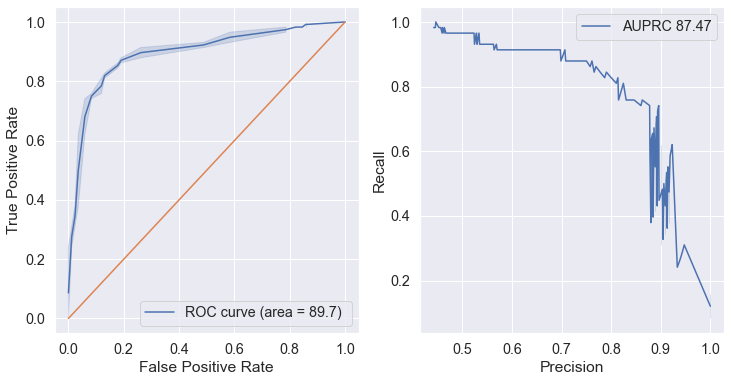

In [23]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
fpr,tpr,threshold = roc_curve(y_test,y_proba)
#sns.set(rc={'figure.figsize':(12,12)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
f1 = sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100) , ax=axes[0])
sns.lineplot(x=[0,1],y=[0,1],markers='--',ax=axes[0])
f1.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
#sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
f2 =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100),ax=axes[1])
f2.set(xlabel='Precision',ylabel='Recall')

In [28]:
from sklearn.model_selection import cross_validate,StratifiedKFold,GridSearchCV

In [29]:
scv = StratifiedKFold(4,random_state=33, shuffle=True)

In [30]:
cv_score =cross_validate(clf,x,y,scoring=['roc_auc','accuracy','f1_weighted'],cv=scv,n_jobs=3,verbose=1)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    3.8s finished


In [31]:
cv_score

{'fit_time': array([0.08377528, 0.06832933, 0.07879019, 0.05585122]),
 'score_time': array([0.00797915, 0.07180882, 0.00698042, 0.00797796]),
 'test_roc_auc': array([0.86349206, 0.840951  , 0.8502938 , 0.85576923]),
 'test_accuracy': array([0.83615819, 0.8079096 , 0.82954545, 0.8125    ]),
 'test_f1_weighted': array([0.8320939 , 0.80701628, 0.82768865, 0.80945514])}

In [32]:

stats = pd.DataFrame(index=['Mean','Std','Min','Max'],
            data={
                'ROC_AUC':[np.mean(cv_score['test_roc_auc']),np.std(cv_score['test_roc_auc']),np.min(cv_score['test_roc_auc']),np.max(cv_score['test_roc_auc'])],
                'Accuracy' : [np.mean(cv_score['test_accuracy']),np.std(cv_score['test_accuracy']),np.min(cv_score['test_accuracy']),np.max(cv_score['test_accuracy'])]
            })

stats = stats.round(4)*100
stats

,ROC_AUC,Accuracy
Mean,85.26,82.15
Std,0.82,1.17
Min,84.10,80.79
Max,86.35,83.62


In [156]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [33]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto']}  
  
cv_model = GridSearchCV(clf,param_grid,cv=scv,verbose=3,scoring='f1_weighted',n_jobs=-1)
cv_model.fit(x,y)


Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=33, shuffle=True),
             estimator=SVC(degree=2, probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto']},
             scoring='f1_weighted', verbose=3)

In [34]:
cv_model.best_params_,cv_model.best_score_

({'C': 0.1, 'gamma': 0.1}, 0.8236071349874132)

In [35]:
y_pred = cv_model.predict(x_test)
y_proba = cv_model.predict_proba(x_test)[:,1]
print('Train Accuracy :', accuracy_score(y_train,cv_model.predict(x_train)).round(4)*100,'ROC :', roc_auc_score(y_train,clf.predict_proba(x_train)[:,1]).round(4)*100)
print('Test Accuracy :', accuracy_score(y_test,y_pred).round(4)*100,'ROC :', roc_auc_score(y_test,y_proba).round(4)*100)
print('--confusion Matrix--')
cm =confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

print('--classification report--')
print(classification_report(y_test,y_pred,labels=[0,1]))


Train Accuracy : 82.98 ROC : 89.89
Test Accuracy : 86.61999999999999 ROC : 91.17
--confusion Matrix--
[[76  8]
 [11 47]]
--classification report--
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        84
           1       0.85      0.81      0.83        58

    accuracy                           0.87       142
   macro avg       0.86      0.86      0.86       142
weighted avg       0.87      0.87      0.87       142



[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

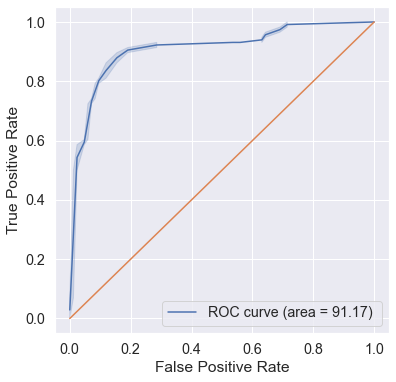

In [36]:
fpr,tpr,threshold = roc_curve(y_test,y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,y_proba)
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(4)*100))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')


[Text(0, 0.5, 'Recall'), Text(0.5, 0, 'Precision')]

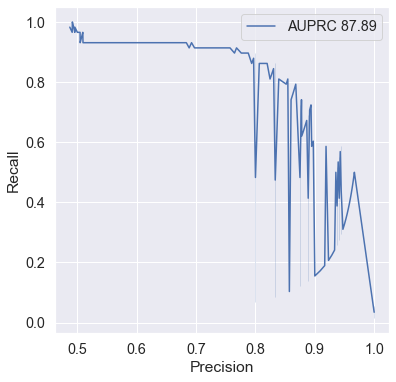

In [37]:
pr, rc, thresholds = precision_recall_curve(y_test, y_proba)
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = average_precision_score(y_test,y_proba)
fig =sns.lineplot(pr,rc,label='AUPRC {}'.format(area.round(4)*100))

fig.set(xlabel='Precision',ylabel='Recall')

In [39]:
test_data = pd.read_csv('test_1.csv')
test_data['temp']= (2*test_data['Pclass']*test_data['Alone'])
#test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
#test_data = encoder.transform(test_data)
test_data

,Pclass,Sex,Embarked,Cabin_Provided,Title,Age_Group,Total_Members,Age_Class,fare_per_person,temp
0,3,1,3,0,1,6,0,103.5,0.945921,6
1,3,2,1,0,3,8,1,141.0,0.000000,0
2,2,1,3,0,1,9,0,124.0,1.028876,4
3,3,1,1,0,1,6,0,81.0,0.985090,6
4,3,2,1,0,3,5,2,66.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,1,6,0,87.0,0.956649,6
414,1,2,2,1,5,7,0,39.0,2.040998,2
415,3,1,1,0,1,7,0,115.5,0.916454,6
416,3,1,1,0,1,6,0,87.0,0.956649,6


In [40]:
#sns.boxplot(test_data['Age'],orient='v')

In [41]:
#test_data.loc[:,num_columns]=scaler.transform(test_data[num_columns])
test_data=scaler.transform(test_data)

In [42]:
scaler.mean_

array([ 2.24220963,  1.36968839,  1.26062323,  0.25779037,  1.80311615,
        5.74504249,  0.95184136, 61.22711048,  0.66450873,  2.64589235])

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


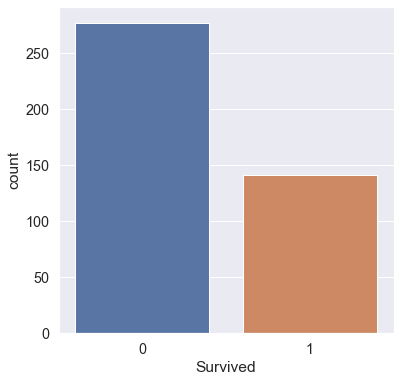

In [43]:

result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': cv_model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')
print(result.head())
sns.countplot(result['Survived'])

In [44]:
test_data = pd.read_csv('test_1.csv')

In [45]:
test_data['Survived'] = result['Survived']

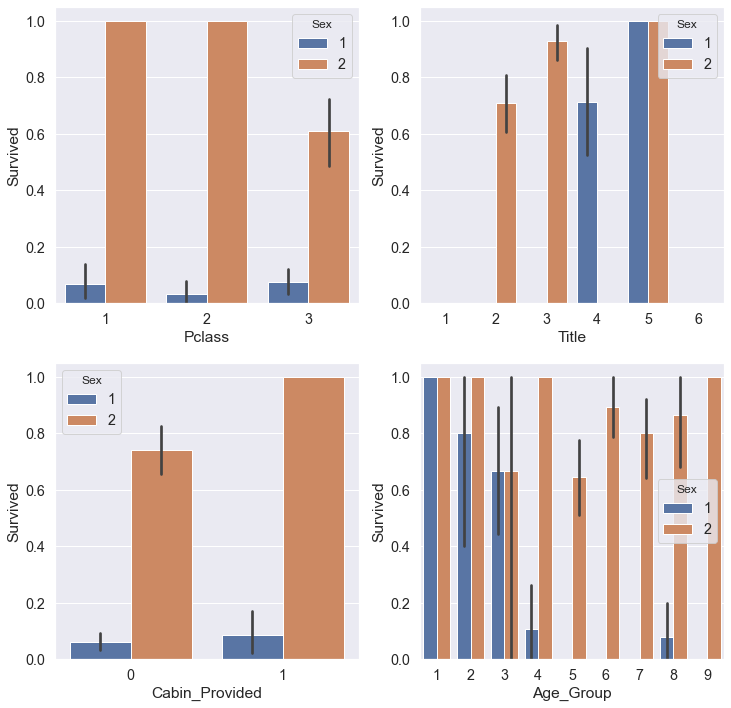

In [46]:
fig,ax = plt.subplots(2,2,figsize=(12, 12))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=test_data,ax=ax[0,0])
sns.barplot(x='Title',y='Survived',hue='Sex',data=test_data,ax=ax[0,1])
sns.barplot(x='Cabin_Provided',y='Survived',hue='Sex',data=test_data,ax=ax[1,0])
sns.barplot(x='Age_Group',y='Survived',hue='Sex',data=test_data,ax=ax[1,1])

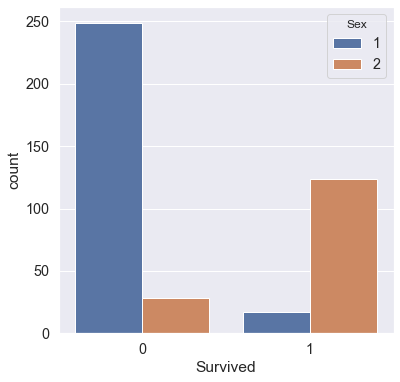

In [47]:
sns.countplot(x='Survived',hue='Sex',data=test_data)

In [106]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
pd.options.display.max_rows = None

In [108]:
test_data[(test_data.Survived == 1) & (test_data.Sex == 1)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Provided,Title,Age_Group,Fare_Group,Total_Members,Age_Class,fare_per_person,Alone,Survived
21,913,3,1,9.00,0,1,0.620219,1,0,4,3,1,1,27.00,0.000000,0,1
64,956,1,1,13.00,2,2,2.420575,2,1,4,4,4,4,13.00,0.000000,0,1
80,972,3,1,6.00,1,1,1.210741,2,0,4,3,3,2,18.00,0.000000,0,1
89,981,2,1,2.00,1,1,1.380211,1,0,4,2,3,2,4.00,0.000000,0,1
131,1023,1,1,53.00,0,0,1.469822,2,1,5,8,3,0,53.00,1.469822,1,1
161,1053,3,1,7.00,1,1,1.210741,2,0,4,3,3,2,21.00,0.000000,0,1
192,1084,3,1,11.50,1,1,1.190332,1,0,4,3,3,2,34.50,0.000000,0,1
194,1086,2,1,8.00,0,2,1.525045,1,0,4,3,4,2,16.00,0.000000,0,1
196,1088,1,1,6.00,0,2,2.131939,2,1,4,3,4,2,6.00,0.000000,0,1
201,1093,3,1,0.33,0,2,1.187521,1,0,4,1,2,2,0.99,0.000000,0,1


In [109]:
result.to_csv('Prediction_72.csv',index=False)